In [1]:
import fastf1 as ff1

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Enable the cache
ff1.Cache.enable_cache('/home/rajaahdjey/Documents/DS_Proj/GitHub/F1 Analysis/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

In [101]:
#engine manufacturers list for analysis

engine_dict = {'Red Bull Racing' : 'Red Bull',
               'Mercedes' : 'Mercedes',
               'Ferrari' : 'Ferrari',
               'McLaren' : 'Mercedes',
               'Alpine' : 'Renault',
               'AlphaTauri' : 'Red Bull',
               'Aston Martin' : 'Mercedes',
               'Williams' : 'Mercedes',
               'Alfa Romeo':'Ferrari',
               'Haas F1 Team':'Ferrari'}

In [10]:
event = ff1.get_event(2022,2)

In [11]:
event

RoundNumber                                                    2
Country                                             Saudi Arabia
Location                                                  Jeddah
OfficialEventName    FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022
EventDate                                    2022-03-27 22:00:00
EventName                               Saudi Arabian Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                                 2022-03-25 17:00:00
Session2                                              Practice 2
Session2Date                                 2022-03-25 20:00:00
Session3                                              Practice 3
Session3Date                                 2022-03-26 17:00:00
Session4                                              Qualifying
Session4Date                                 2022-03-26 20:00:00
Session5                 

In [12]:
# Load the session data
race = ff1.get_session(2022, 'Saudi Arabian','Q')
Q_laps = race.load(telemetry=True)

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetchi

In [16]:
laps_data = race.laps

In [20]:
drivers = laps_data['Driver'].unique()

In [98]:
laps_data.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'LapStartTime', 'Team', 'Driver', 'TrackStatus',
       'IsAccurate', 'LapStartDate'],
      dtype='object')

In [102]:
Speed_Trap = pd.DataFrame()
Speed_Trap["Driver"]=drivers
Speed_Trap.set_index('Driver',inplace=True)
for driver in drivers:
    filter_df = laps_data[laps_data["Driver"]==driver]
    print(f'Laps for driver {driver} : {filter_df.shape[0]}')
    fastest_speed = filter_df["SpeedST"].max()
    team = filter_df['Team'].unique().item()
    Speed_Trap.at[driver,"fastest_speed"]=fastest_speed
    Speed_Trap.at[driver,"Team"]=team
    Speed_Trap.at[driver,"Engine"]=engine_dict[team]

Laps for driver PER : 19
Laps for driver LEC : 22
Laps for driver SAI : 22
Laps for driver OCO : 19
Laps for driver RUS : 21
Laps for driver ALO : 20
Laps for driver BOT : 22
Laps for driver GAS : 22
Laps for driver MAG : 24
Laps for driver NOR : 16
Laps for driver RIC : 17
Laps for driver ZHO : 17
Laps for driver MSC : 13
Laps for driver STR : 15
Laps for driver HAM : 11
Laps for driver ALB : 9
Laps for driver HUL : 10
Laps for driver LAT : 4
Laps for driver TSU : 2
Laps for driver VER : 22


In [103]:
Speed_Trap.sort_values(by = 'fastest_speed',ascending=False,inplace=True)

In [104]:
Speed_Trap

,fastest_speed,Team,Engine
Driver,,,
PER,335.0,Red Bull Racing,Red Bull
VER,334.0,Red Bull Racing,Red Bull
MAG,330.0,Haas F1 Team,Ferrari
ALO,328.0,Alpine,Renault
BOT,328.0,Alfa Romeo,Ferrari
GAS,328.0,AlphaTauri,Red Bull
MSC,328.0,Haas F1 Team,Ferrari
SAI,327.0,Ferrari,Ferrari
LEC,327.0,Ferrari,Ferrari


In [81]:
 #Source for color and font schemes: https://github.com/empathy87/storytelling-with-data
# colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configure plot font family to Roboto Slab
plt.rcParams['font.family'] = 'Roboto Slab'
# configure mathtext bold and italic font family to Roboto Slab
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Roboto Slab:bold'
plt.rcParams['mathtext.it'] = 'Roboto Slab:italic'

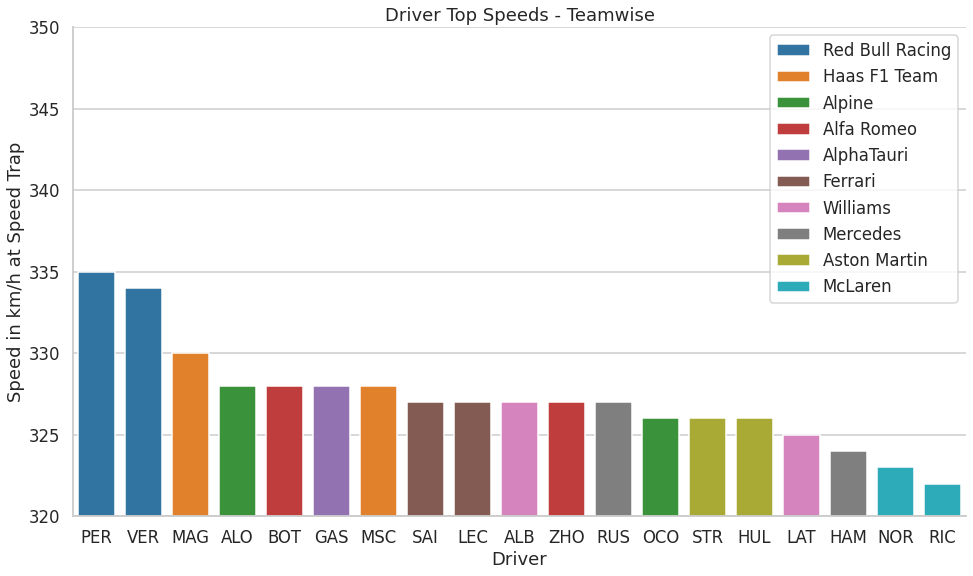

In [111]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('whitegrid')
sns.barplot(x = Speed_Trap.index[:-1], y = 'fastest_speed',data = Speed_Trap[:-1],hue='Team',dodge=False)
#omitting Yuki Tsunoda as he did not set a time
sns.despine()
sns.set_context('talk') #to make fonts bigger for easy readability
plt.title("Driver Top Speeds - Teamwise")
ax.set_xlabel('Driver')
ax.set_ylabel('Speed in km/h at Speed Trap')
plt.legend(loc='upper right')
ax.set(ylim=(320,350));

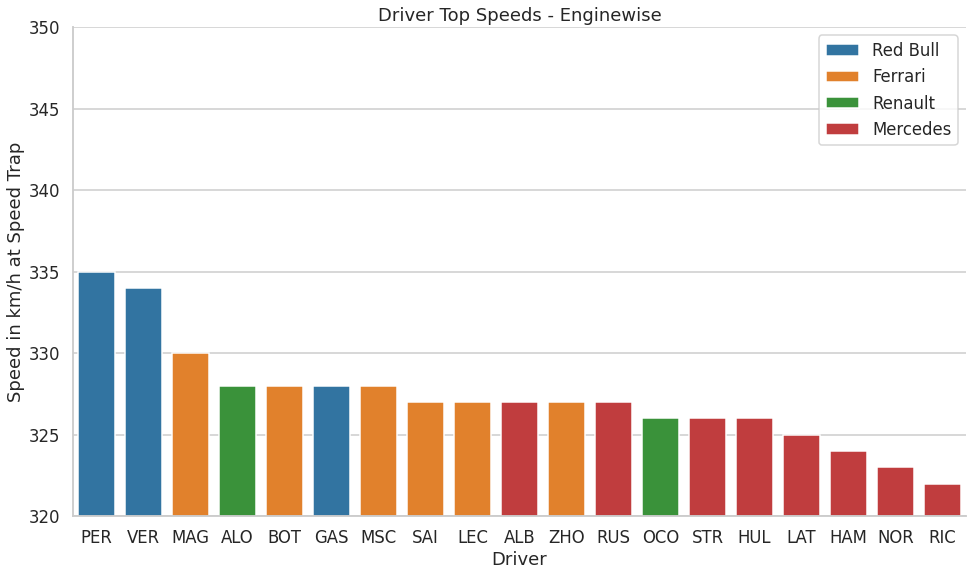

In [110]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('whitegrid')
sns.barplot(x = Speed_Trap.index[:-1], y = 'fastest_speed',data = Speed_Trap[:-1],hue='Engine',dodge=False)
#omitting Yuki Tsunoda as he did not set a time
sns.despine()
sns.set_context('talk') #to make fonts bigger for easy readability
plt.title("Driver Top Speeds - Enginewise")
ax.set_xlabel('Driver')
ax.set_ylabel('Speed in km/h at Speed Trap')
plt.legend(loc='upper right')
ax.set(ylim=(320,350));

In [118]:
ric_lap = race.laps.pick_driver('RIC').pick_fastest()
nor_lap = race.laps.pick_driver('NOR').pick_fastest()
ric_tel = ric_lap.get_car_data().add_distance()
nor_tel = nor_lap.get_car_data().add_distance()

In [124]:
nor_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-03-26 18:42:15.535,10706,301,8,99,False,14,car,0 days 00:00:00.210000,0 days 01:56:39.592000,17.558333
1,2022-03-26 18:42:15.695,10733,302,8,99,False,14,car,0 days 00:00:00.370000,0 days 01:56:39.752000,30.980556
2,2022-03-26 18:42:15.895,10726,304,8,99,False,14,car,0 days 00:00:00.570000,0 days 01:56:39.952000,47.869444
3,2022-03-26 18:42:16.335,10805,307,8,99,False,14,car,0 days 00:00:01.010000,0 days 01:56:40.392000,85.391667
4,2022-03-26 18:42:16.615,10881,309,8,99,False,14,car,0 days 00:00:01.290000,0 days 01:56:40.672000,109.425000
...,...,...,...,...,...,...,...,...,...,...,...
327,2022-03-26 18:43:43.816,11708,292,7,100,False,14,car,0 days 00:01:28.491000,0 days 01:58:07.873000,5997.879167
328,2022-03-26 18:43:44.056,11613,294,7,100,False,14,car,0 days 00:01:28.731000,0 days 01:58:08.113000,6017.479167
329,2022-03-26 18:43:44.456,10398,295,8,100,False,14,car,0 days 00:01:29.131000,0 days 01:58:08.513000,6050.256944
330,2022-03-26 18:43:44.696,10476,296,8,100,False,14,car,0 days 00:01:29.371000,0 days 01:58:08.753000,6069.990278


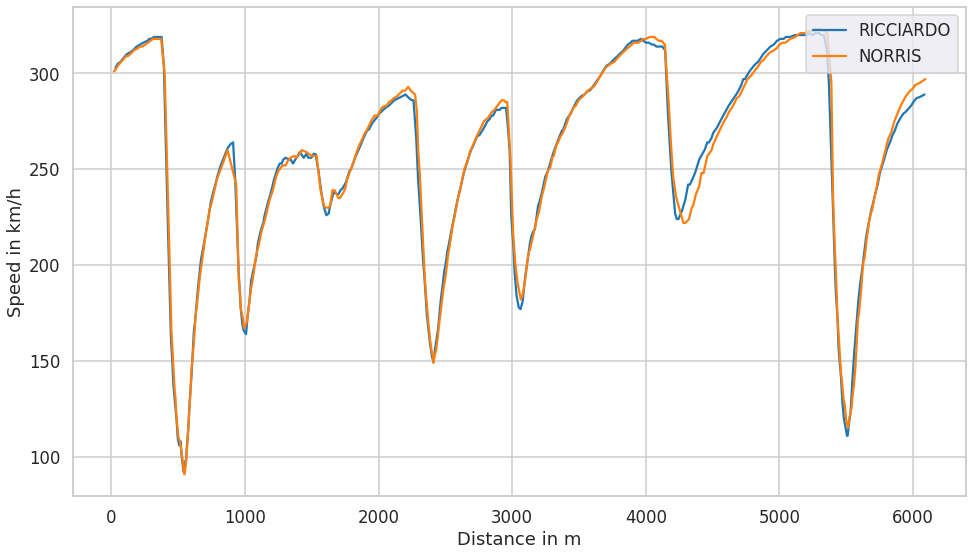

In [155]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
sns.lineplot(ax = ax, x = ric_tel['Distance'], y = ric_tel['Speed'],label='RICCIARDO')
sns.lineplot(ax = ax, x = nor_tel['Distance'], y = nor_tel['Speed'],label='NORRIS')
ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
plt.legend(loc='upper right');

In [130]:
nor_tel.query("Speed == Speed.max()")

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
282,2022-03-26 18:43:31.696,11424,323,8,99,False,14,car,0 days 00:01:16.371000,0 days 01:57:55.753000,5273.627778
283,2022-03-26 18:43:32.095,11350,323,8,99,False,14,car,0 days 00:01:16.770000,0 days 01:57:56.152000,5309.426944


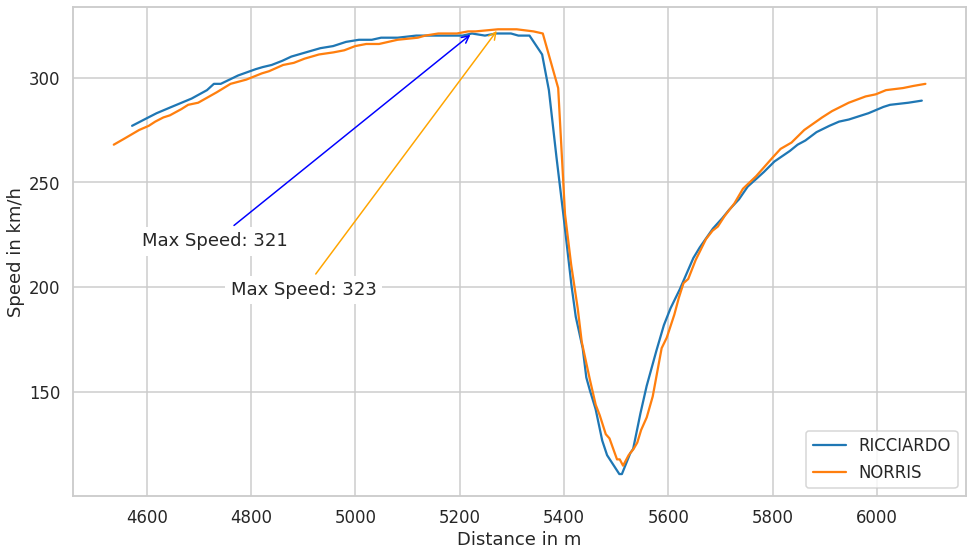

In [154]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style('whitegrid')
sns.lineplot(ax = ax, x = ric_tel['Distance'][250:], y = ric_tel['Speed'][250:],label='RICCIARDO')
sns.lineplot(ax = ax, x = nor_tel['Distance'][250:], y = nor_tel['Speed'][250:],label='NORRIS')
ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
plt.legend(loc='lower right');

#annotate code : https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot/43375405#43375405

def annot_max_nor(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Max Speed: {:.0f}".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props_ric = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
    arrowprops=dict(arrowstyle="->",color='orange')
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props_ric, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.34,0.44), **kw)
    
def annot_max_ric(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Max Speed: {:.0f}".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props_ric = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0)
    arrowprops=dict(arrowstyle="->",color='blue')
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props_ric, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.24,0.54), **kw)

annot_max_nor(nor_tel['Distance'],nor_tel['Speed'])
annot_max_ric(ric_tel['Distance'],ric_tel['Speed'])